In [3]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [4]:
df = pd.read_csv('meteorite.csv')

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 45716 entries, 0 to 45715
Data columns (total 12 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   name               45716 non-null  object 
 1   id                 45716 non-null  int64  
 2   name_type          45716 non-null  object 
 3   class              45716 non-null  object 
 4   mass               45585 non-null  float64
 5   fall               45716 non-null  object 
 6   year               45716 non-null  int64  
 7   lat                38401 non-null  float64
 8   long               38401 non-null  float64
 9   geolocation        38401 non-null  object 
 10  classification_id  45716 non-null  int64  
 11  category           45711 non-null  object 
dtypes: float64(3), int64(3), object(6)
memory usage: 4.2+ MB


In [8]:
df.head()

,name,id,name_type,class,mass,fall,year,lat,long,geolocation,classification_id,category
0,Aachen,1,Valid,L5,21.0,Fell,1880,50.77500,6.08333,"(50.775, 6.08333)",3,Chondrite
1,Aarhus,2,Valid,H6,720.0,Fell,1951,56.18333,10.23333,"(56.18333, 10.23333)",4,Chondrite
2,Abee,6,Valid,EH4,107000.0,Fell,1952,54.21667,-113.00000,"(54.21667, -113.0)",112,Chondrite
3,Acapulco,10,Valid,Acapulcoite,1914.0,Fell,1976,16.88333,-99.90000,"(16.88333, -99.9)",56,Achondrite
4,Achiras,370,Valid,L6,780.0,Fell,1902,-33.16667,-64.95000,"(-33.16667, -64.95)",1,Chondrite


In [9]:
import geopandas as gpd
from shapely.geometry import Point

geometry = [Point(xy) for xy in zip(df['long'], df['lat'])]
gdf = gpd.GeoDataFrame(df, geometry=geometry)


<Axes: >

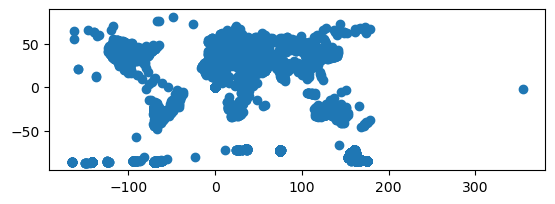

In [14]:
gdf.plot()

In [12]:
world = gpd.read_file(gpd.datasets.get_path('naturalearth_lowres'))
# naturalearth_lowres is the only reference/walkthrough I could find. How do I get other paths?

C:\Users\M252606\AppData\Local\Temp\ipykernel_20804\3890440701.py:1: FutureWarning: The geopandas.dataset module is deprecated and will be removed in GeoPandas 1.0. You can get the original 'naturalearth_lowres' data from https://www.naturalearthdata.com/downloads/110m-cultural-vectors/.
  world = gpd.read_file(gpd.datasets.get_path('naturalearth_lowres'))


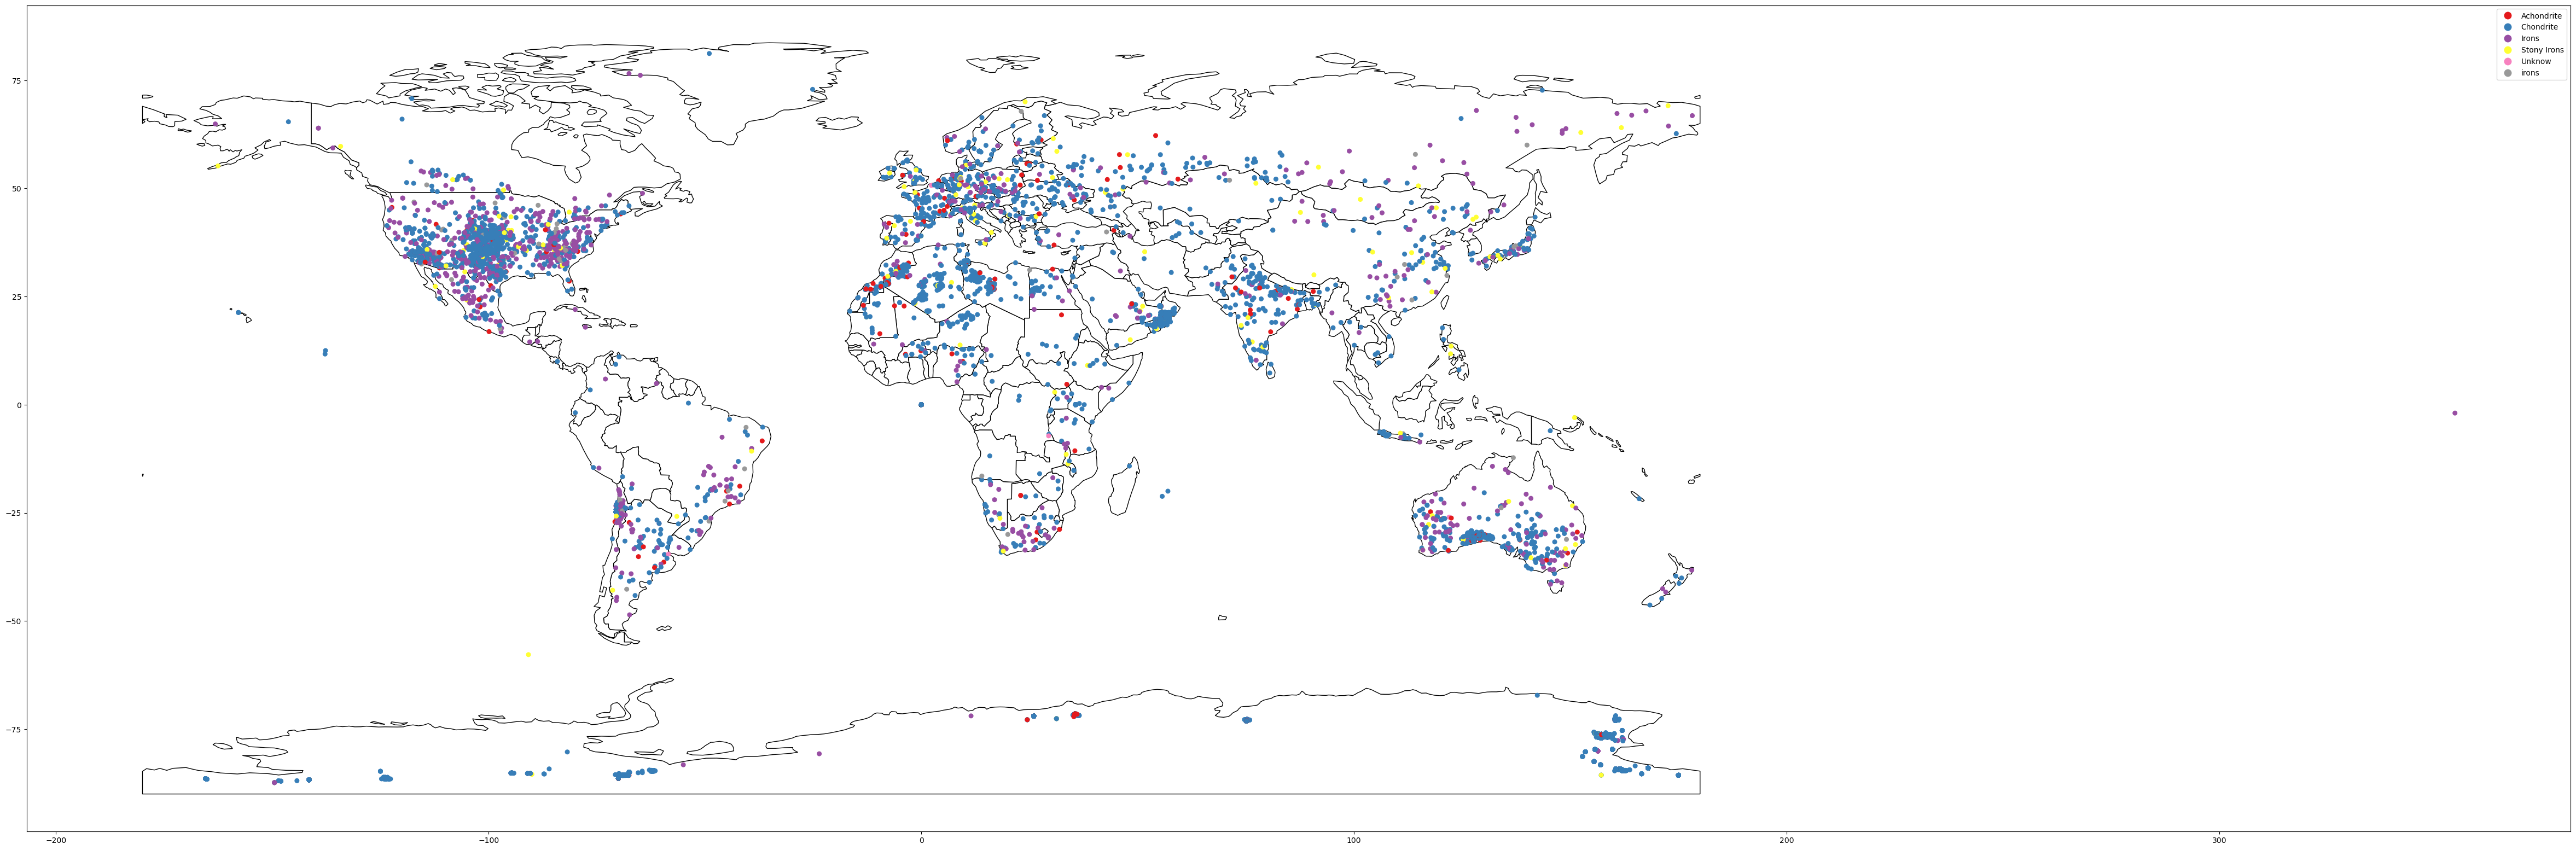

In [22]:
# Plot the world map
world.plot(figsize=(60, 60), color='white', edgecolor='black')

# Overlay the GeoDataFrame
gdf.plot(ax=plt.gca(), column='category', cmap='Set1', markersize=30, legend=True)

# Show the plot
plt.show()

<Axes: xlabel='mass', ylabel='Count'>

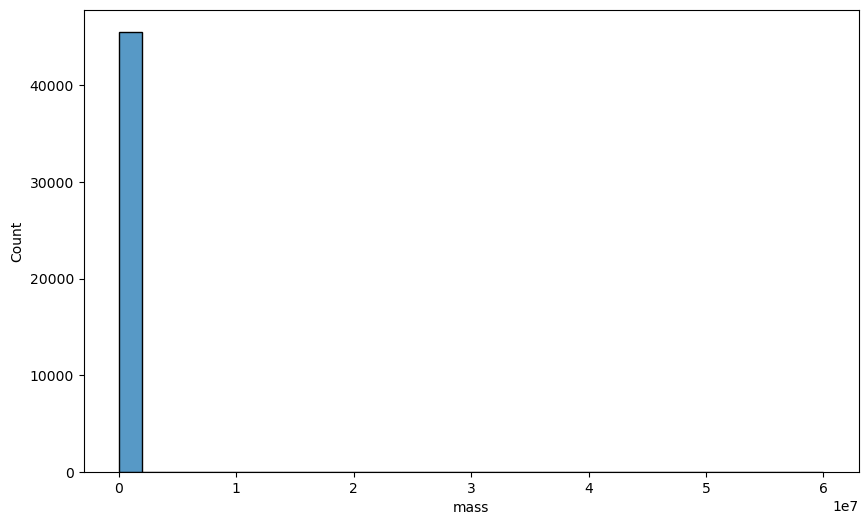

In [56]:
plt.figure(figsize=(10, 6))
sns.histplot(df['mass'], bins=30)

<Axes: xlabel='mass', ylabel='Count'>

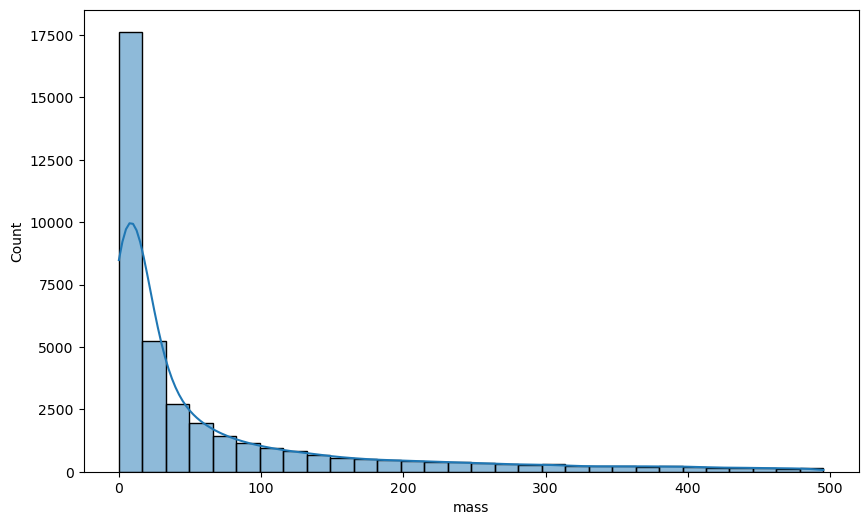

In [173]:
# Calculate quartiles
Q1 = df['mass'].quantile(0.25)
Q3 = df['mass'].quantile(0.75)

# Calculate IQR
IQR = Q3 - Q1

# Define lower and upper bounds for outliers
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

mass_without_outliers = df[(df['mass'] >= lower_bound) & (df['mass'] <= upper_bound)]

plt.figure(figsize=(10, 6))
sns.histplot(mass_without_outliers['mass'], bins=30, kde=True)


<Axes: xlabel='category', ylabel='mass'>

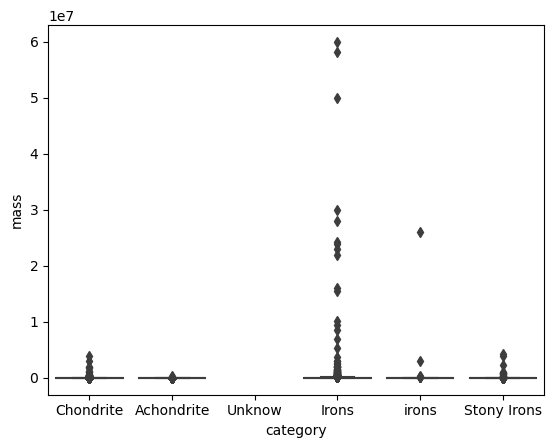

In [174]:
sns.boxplot(data=df, x='category', y='mass')

<Axes: xlabel='category', ylabel='mass'>

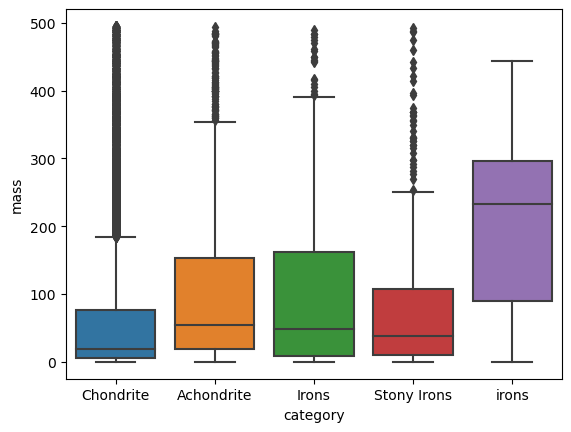

In [175]:
sns.boxplot(data=mass_without_outliers, x='category', y='mass')

In [78]:
color_fell_found={'Fell': 'red','Found':'green'}

<Axes: xlabel='fall', ylabel='count'>

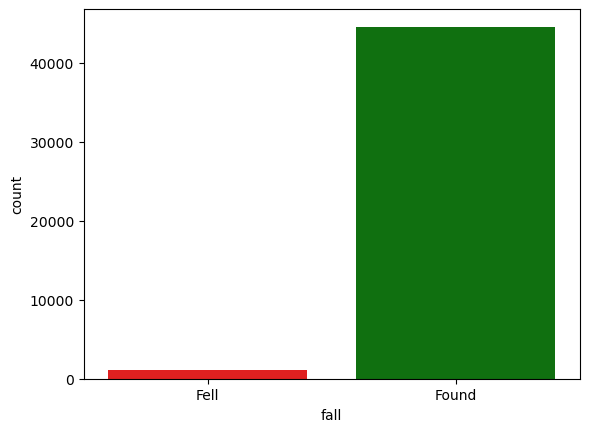

In [83]:
sns.countplot(data=df,x='fall',palette=color_fell_found)

([<matplotlib.patches.Wedge at 0x1529eed5290>,
 [Text(-1.0968186403555267, 0.08359946272945676, 'Found'),
  Text(1.0968186330175727, -0.08359955900280544, 'Fell')])

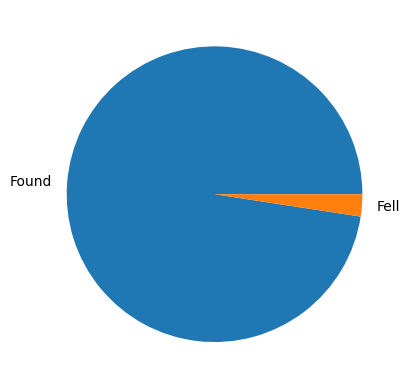

In [125]:
fall_status_counts = df['fall'].value_counts()

plt.pie(fall_status_counts, labels=fall_status_counts.index)

<Axes: xlabel='year', ylabel='count'>

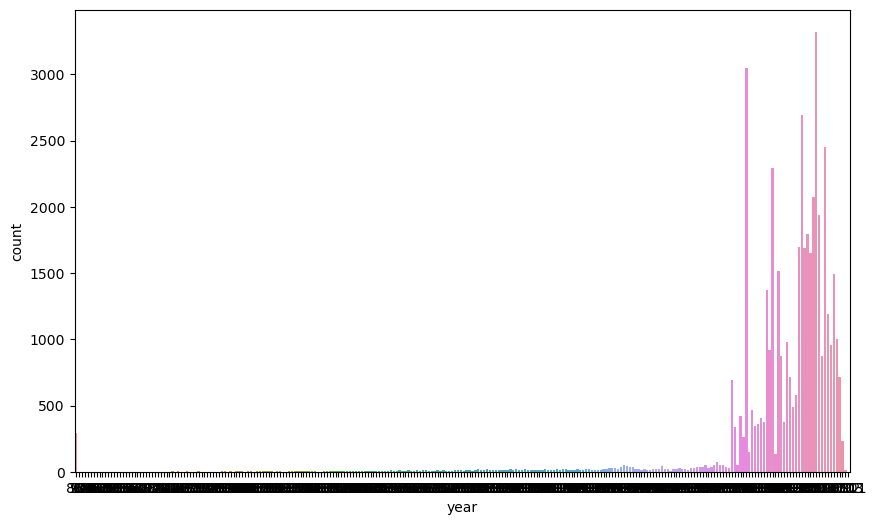

In [68]:
plt.figure(figsize=(10, 6))
sns.countplot(data=df, x='year')

In [73]:
modern_years_df = df[df['year'] >= 1950]

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
        17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33,
        34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50,
        51, 52, 53, 54, 55, 56, 57, 58, 59, 60, 61, 62, 63, 64]),
 [Text(0, 0, '1950'),
  Text(1, 0, '1951'),
  Text(2, 0, '1952'),
  Text(3, 0, '1953'),
  Text(4, 0, '1954'),
  Text(5, 0, '1955'),
  Text(6, 0, '1956'),
  Text(7, 0, '1957'),
  Text(8, 0, '1958'),
  Text(9, 0, '1959'),
  Text(10, 0, '1960'),
  Text(11, 0, '1961'),
  Text(12, 0, '1962'),
  Text(13, 0, '1963'),
  Text(14, 0, '1964'),
  Text(15, 0, '1965'),
  Text(16, 0, '1966'),
  Text(17, 0, '1967'),
  Text(18, 0, '1968'),
  Text(19, 0, '1969'),
  Text(20, 0, '1970'),
  Text(21, 0, '1971'),
  Text(22, 0, '1972'),
  Text(23, 0, '1973'),
  Text(24, 0, '1974'),
  Text(25, 0, '1975'),
  Text(26, 0, '1976'),
  Text(27, 0, '1977'),
  Text(28, 0, '1978'),
  Text(29, 0, '1979'),
  Text(30, 0, '1980'),
  T

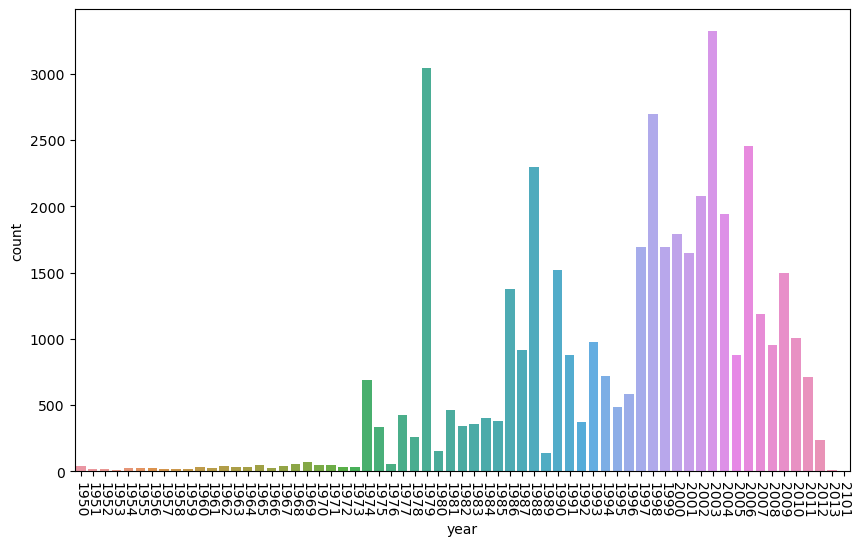

In [76]:
plt.figure(figsize=(10, 6))
sns.countplot(data=modern_years_df, x='year')
plt.xticks(rotation=-90)

<Axes: xlabel='class', ylabel='count'>

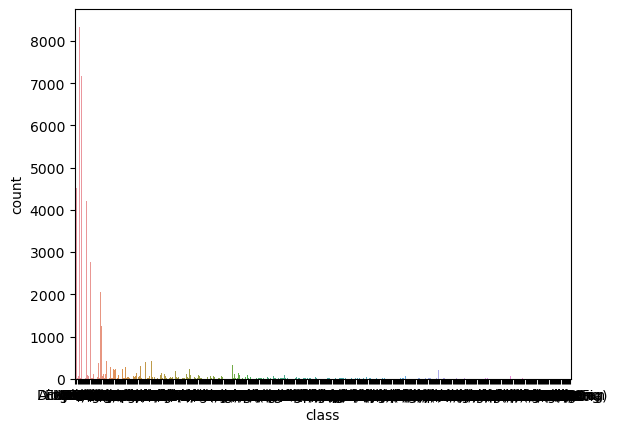

In [60]:
sns.countplot(data=df, x='class')

In [105]:
top_25_classes = df['class'].value_counts().head(25).index.tolist()

In [112]:
# Select the top 25 classes based on their frequency
df_top_25 = df[df['class'].isin(top_25_classes)].copy()

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
        17, 18, 19, 20, 21, 22, 23, 24]),
 [Text(0, 0, 'L5'),
  Text(1, 0, 'H6'),
  Text(2, 0, 'L6'),
  Text(3, 0, 'H5'),
  Text(4, 0, 'H4'),
  Text(5, 0, 'LL5'),
  Text(6, 0, 'CV3'),
  Text(7, 0, 'L3'),
  Text(8, 0, 'LL6'),
  Text(9, 0, 'L4'),
  Text(10, 0, 'CM2'),
  Text(11, 0, 'LL4'),
  Text(12, 0, 'Howardite'),
  Text(13, 0, 'Eucrite-pmict'),
  Text(14, 0, 'Diogenite'),
  Text(15, 0, 'Eucrite'),
  Text(16, 0, 'Iron, IIIAB'),
  Text(17, 0, 'Mesosiderite'),
  Text(18, 0, 'Ureilite'),
  Text(19, 0, 'H3'),
  Text(20, 0, 'H4/5'),
  Text(21, 0, 'H5/6'),
  Text(22, 0, 'LL'),
  Text(23, 0, 'CO3'),
  Text(24, 0, 'E3')])

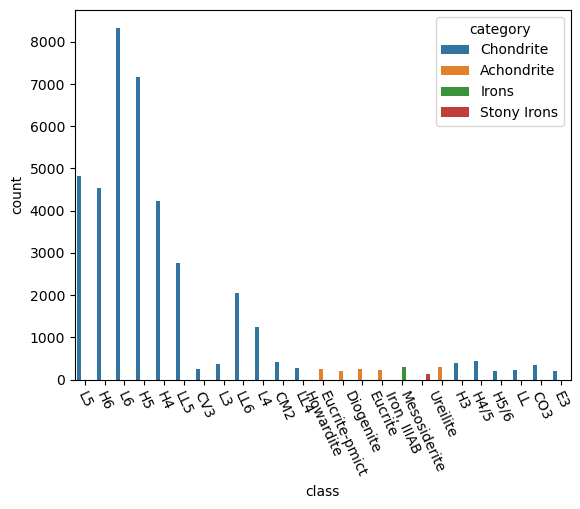

In [110]:
sns.countplot(data=df_top_25, x='class', hue='category')
plt.xticks(rotation=-65)

In [121]:
numerical_columns = ['mass', 'year']

In [122]:
correlation_matrix = df[numerical_columns].corr()

<Axes: >

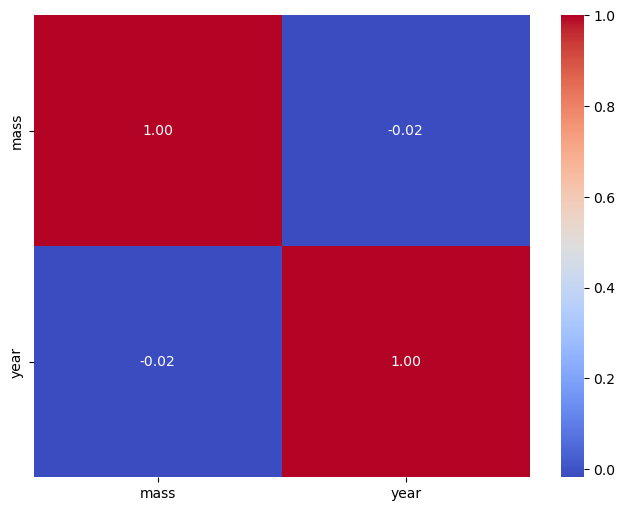

In [123]:
plt.figure(figsize=(8, 6))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")

In [129]:
top_10_masses_indices = df['mass'].nlargest(10).index

In [130]:
df_top_10_masses = df.loc[top_10_masses_indices]

In [131]:
df_top_10_masses

,name,id,name_type,class,mass,fall,year,lat,long,geolocation,classification_id,category
16392,Hoba,11890,Valid,"Iron, IVB",60000000.0,Found,1920,-19.58333,17.91667,"(-19.58333, 17.91667)",132,Irons
5373,Cape York,5262,Valid,"Iron, IIIAB",58200000.0,Found,1818,76.13333,-64.93333,"(76.13333, -64.93333)",15,Irons
5365,Campo del Cielo,5247,Valid,"Iron, IAB-MG",50000000.0,Found,1575,-27.46667,-60.58333,"(-27.46667, -60.58333)",40,Irons
5370,Canyon Diablo,5257,Valid,"Iron, IAB-MG",30000000.0,Found,1891,35.05000,-111.03333,"(35.05, -111.03333)",40,Irons
3455,Armanty,2335,Valid,"Iron, IIIE",28000000.0,Found,1898,47.00000,88.00000,"(47.0, 88.0)",130,Irons
12613,Gibeon,10912,Valid,"Iron, IVA",26000000.0,Found,1836,-25.50000,18.00000,"(-25.5, 18.0)",47,irons
5468,Chupaderos,5363,Valid,"Iron, IIIAB",24300000.0,Found,1852,27.00000,-105.10000,"(27.0, -105.1)",15,Irons
26297,Mundrabilla,16852,Valid,"Iron, IAB-ung",24000000.0,Found,1911,-30.78333,127.55000,"(-30.78333, 127.55)",67,Irons
920,Sikhote-Alin,23593,Valid,"Iron, IIAB",23000000.0,Fell,1947,46.16000,134.65333,"(46.16, 134.65333)",29,Irons
5016,Bacubirito,4919,Valid,"Iron, ungrouped",22000000.0,Found,1863,26.20000,-107.83333,"(26.2, -107.83333)",30,Irons


C:\Users\M252606\AppData\Local\anaconda3\Lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


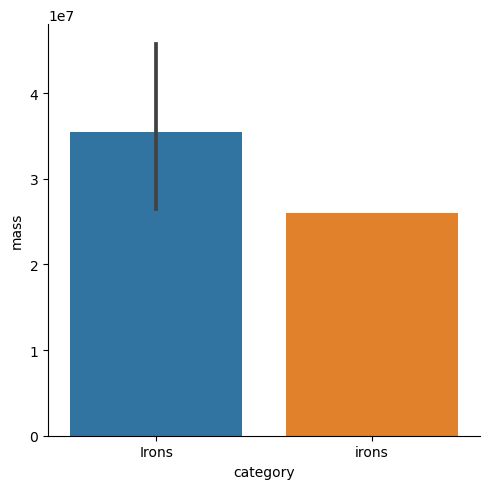

In [132]:
sns.catplot(data=df_top_10_masses, x='category',y='mass', kind='bar')

In [133]:
df_top_10_masses['category'] = df_top_10_masses['category'].replace('irons', 'Irons')

C:\Users\M252606\AppData\Local\anaconda3\Lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


<Figure size 1000x600 with 0 Axes>

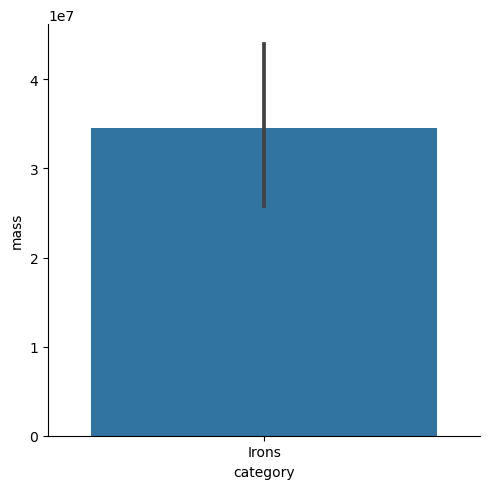

In [135]:
plt.figure(figsize=(10, 6))
sns.catplot(data=df_top_10_masses, x='category',y='mass', kind='bar')

C:\Users\M252606\AppData\Local\anaconda3\Lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


(array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9]),
 [Text(0, 0, 'Hoba'),
  Text(1, 0, 'Cape York'),
  Text(2, 0, 'Campo del Cielo'),
  Text(3, 0, 'Canyon Diablo'),
  Text(4, 0, 'Armanty'),
  Text(5, 0, 'Gibeon'),
  Text(6, 0, 'Chupaderos'),
  Text(7, 0, 'Mundrabilla'),
  Text(8, 0, 'Sikhote-Alin'),
  Text(9, 0, 'Bacubirito')])

<Figure size 1000x5000 with 0 Axes>

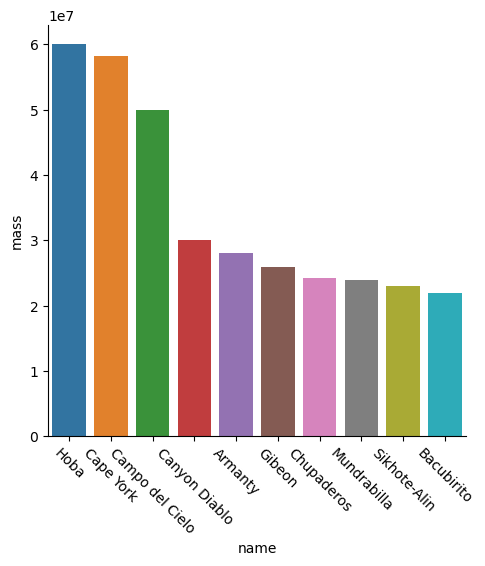

In [141]:
plt.figure(figsize=(10, 50))
sns.catplot(data=df_top_10_masses, x='name',y='mass', kind='bar')
plt.xticks(rotation=-45)

In [142]:
geometry = [Point(xy) for xy in zip(df_top_10_masses['long'], df_top_10_masses['lat'])]
gdf_top_10_masses = gpd.GeoDataFrame(df_top_10_masses, geometry=geometry)

<Axes: >

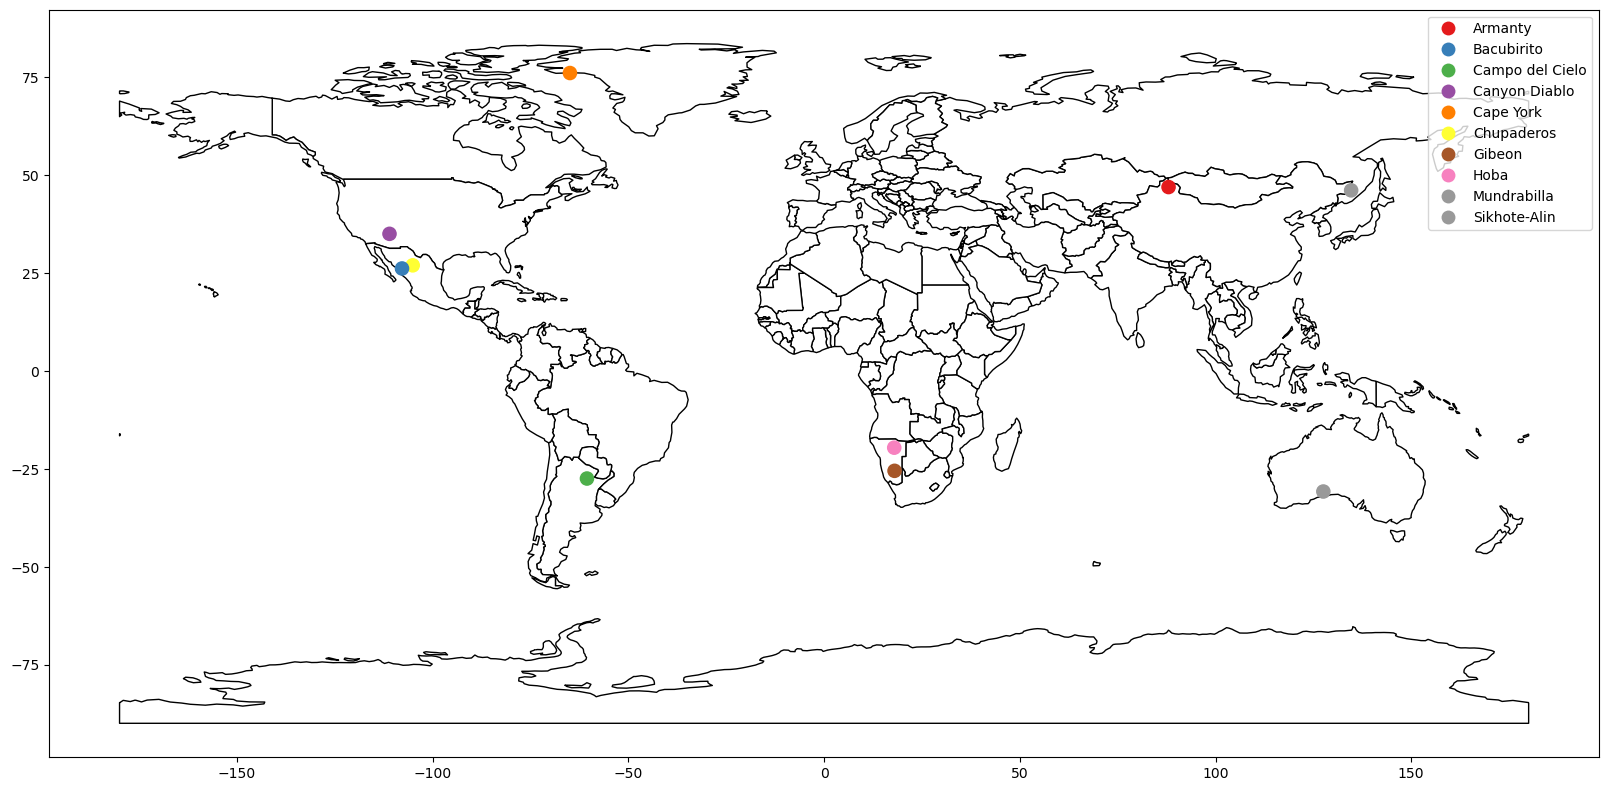

In [159]:
# Plot the world map
world.plot(figsize=(20, 20), color='white', edgecolor='black')

# Overlay the GeoDataFrame
gdf_top_10_masses.plot(ax=plt.gca(), column='name', cmap='Set1', markersize=90, legend=True)

<Axes: xlabel='year', ylabel='mass'>

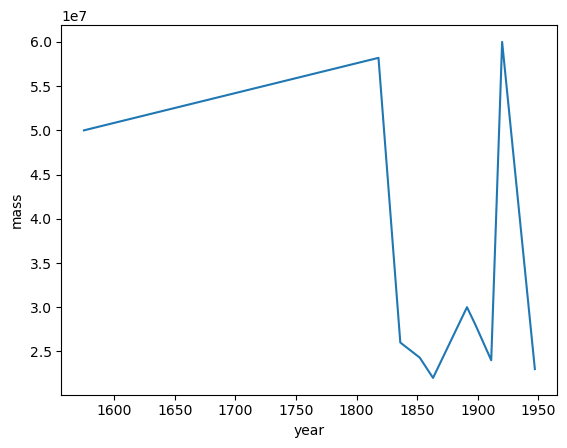

In [160]:
sns.lineplot(data=df_top_10_masses, x='year',y='mass')

<Axes: xlabel='year', ylabel='mass'>

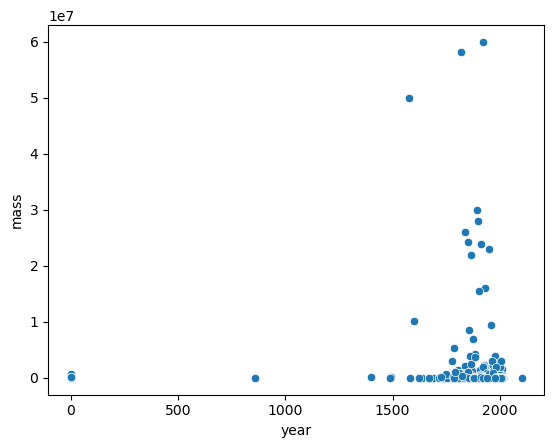

In [162]:
sns.scatterplot(data=df, x='year',y='mass')

<Axes: xlabel='category', ylabel='mass'>

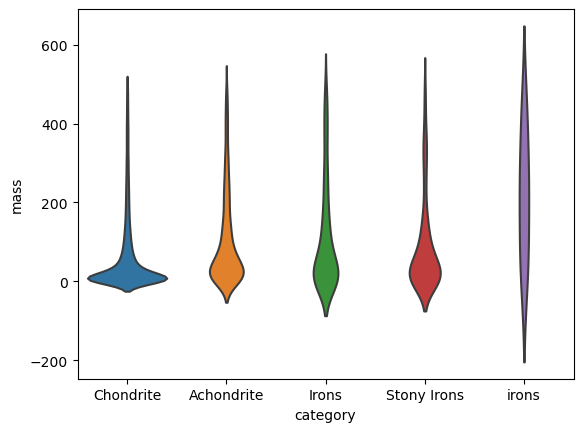

In [177]:
sns.violinplot(x='category', y='mass', data=mass_without_outliers, inner=None)

In [184]:
unique_categories = df['category'].unique()

In [185]:
unique_categories

array(['Chondrite', 'Achondrite', 'Unknow', 'Irons', 'Stony Irons', nan],
      dtype=object)

In [183]:
df['category'] = df['category'].replace({'iron': 'Iron', 'Iron': 'Iron'})

In [262]:
df_top_10_masses_proportion.head()

,name,id,name_type,class,mass,fall,year,lat,long,geolocation,classification_id,category
16392,Hoba,11890,Valid,"Iron, IVB",6000.0,Found,1920,-19.58333,17.91667,"(-19.58333, 17.91667)",132,Irons
5373,Cape York,5262,Valid,"Iron, IIIAB",5820.0,Found,1818,76.13333,-64.93333,"(76.13333, -64.93333)",15,Irons
5365,Campo del Cielo,5247,Valid,"Iron, IAB-MG",5000.0,Found,1575,-27.46667,-60.58333,"(-27.46667, -60.58333)",40,Irons
5370,Canyon Diablo,5257,Valid,"Iron, IAB-MG",3000.0,Found,1891,35.05000,-111.03333,"(35.05, -111.03333)",40,Irons
3455,Armanty,2335,Valid,"Iron, IIIE",2800.0,Found,1898,47.00000,88.00000,"(47.0, 88.0)",130,Irons


In [259]:
df_top_10_masses_proportion['mass'] = df_top_10_masses['mass']/10000

In [260]:
geometry = [Point(xy) for xy in zip(df_top_10_masses_proportion['long'], df_top_10_masses_proportion['lat'])]
gdf_top_10_masses_proportion = gpd.GeoDataFrame(df_top_10_masses_proportion, geometry=geometry)

<Axes: >

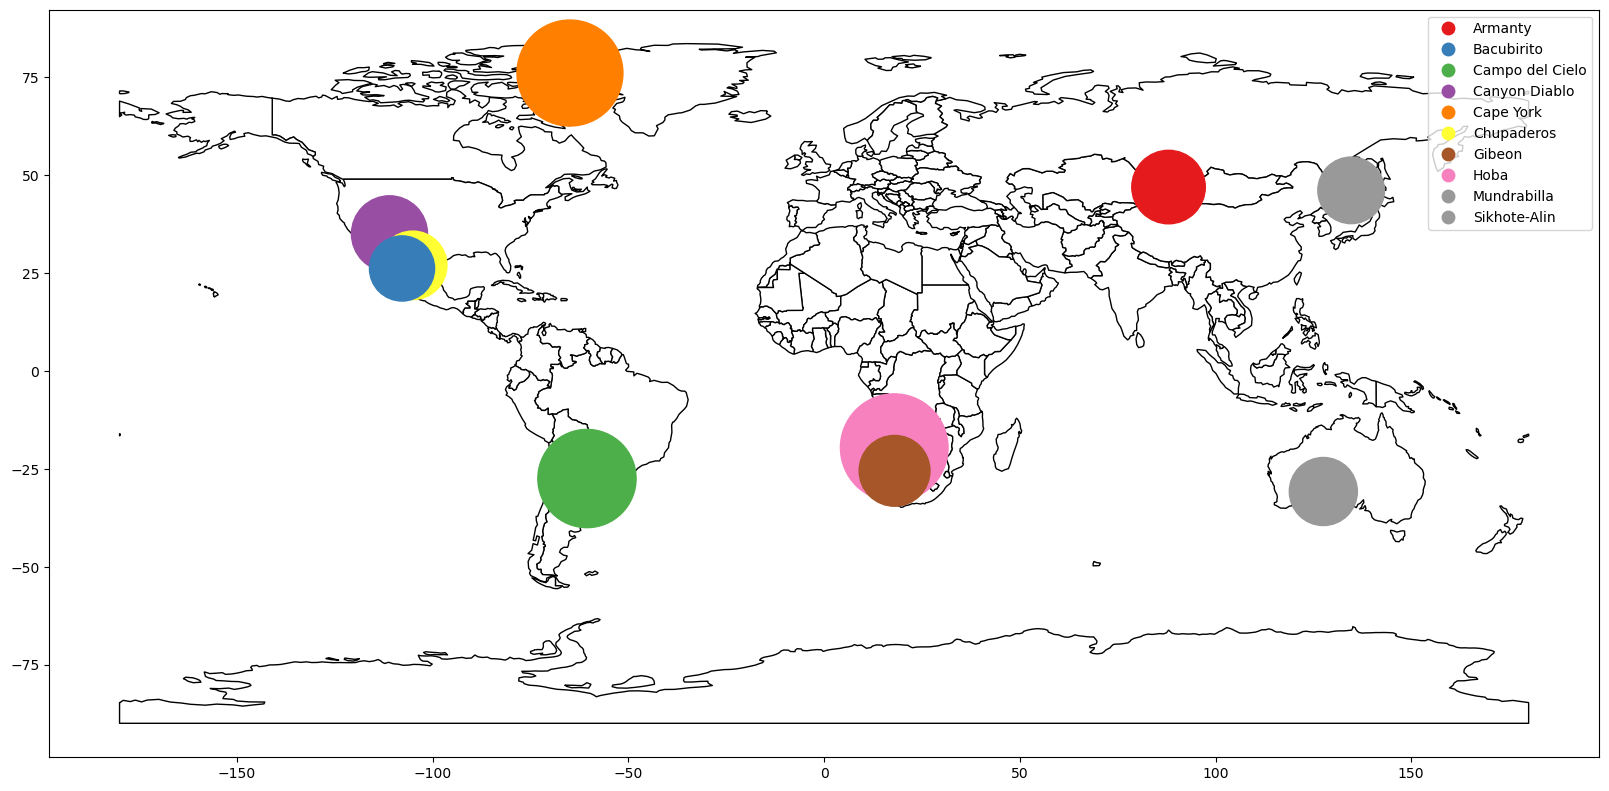

In [261]:
# Plot the world map
world.plot(figsize=(20, 20), color='white', edgecolor='black')

# Overlay the GeoDataFrame
gdf_top_10_masses_proportion.plot(ax=plt.gca(), column='name', cmap='Set1', markersize='mass', legend=True)


<Axes: xlabel='category', ylabel='count'>

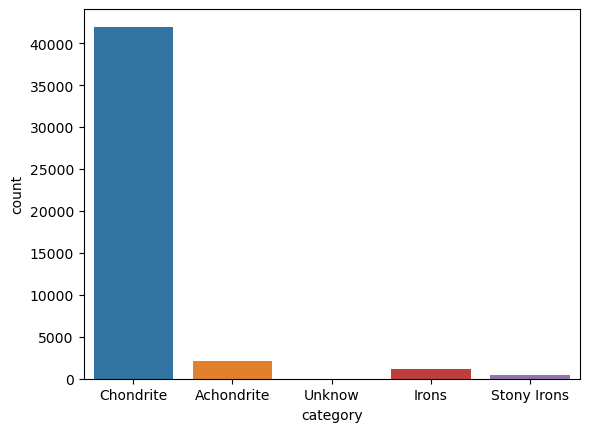

In [269]:
sns.countplot(data=df,x='category')

In [272]:
df['name_length'] = df['name'].apply(len)

In [273]:
df

,name,id,name_type,class,mass,fall,year,lat,long,geolocation,classification_id,category,name_length
0,Aachen,1,Valid,L5,21.0,Fell,1880,50.77500,6.08333,"(50.775, 6.08333)",3,Chondrite,6
1,Aarhus,2,Valid,H6,720.0,Fell,1951,56.18333,10.23333,"(56.18333, 10.23333)",4,Chondrite,6
2,Abee,6,Valid,EH4,107000.0,Fell,1952,54.21667,-113.00000,"(54.21667, -113.0)",112,Chondrite,4
3,Acapulco,10,Valid,Acapulcoite,1914.0,Fell,1976,16.88333,-99.90000,"(16.88333, -99.9)",56,Achondrite,8
4,Achiras,370,Valid,L6,780.0,Fell,1902,-33.16667,-64.95000,"(-33.16667, -64.95)",1,Chondrite,7
...,...,...,...,...,...,...,...,...,...,...,...,...,...
45711,Zillah 002,31356,Valid,Eucrite,172.0,Found,1990,29.03700,17.01850,"(29.037, 17.0185)",21,Achondrite,10
45712,Zinder,30409,Valid,"Pallasite, ungrouped",46.0,Found,1999,13.78333,8.96667,"(13.78333, 8.96667)",216,Stony Irons,6
45713,Zlin,30410,Valid,H4,3.3,Found,1939,49.25000,17.66667,"(49.25, 17.66667)",5,Chondrite,4
45714,Zubkovsky,31357,Valid,L6,2167.0,Found,2003,49.78917,41.50460,"(49.78917, 41.5046)",1,Chondrite,9


<Axes: xlabel='category', ylabel='name_length'>

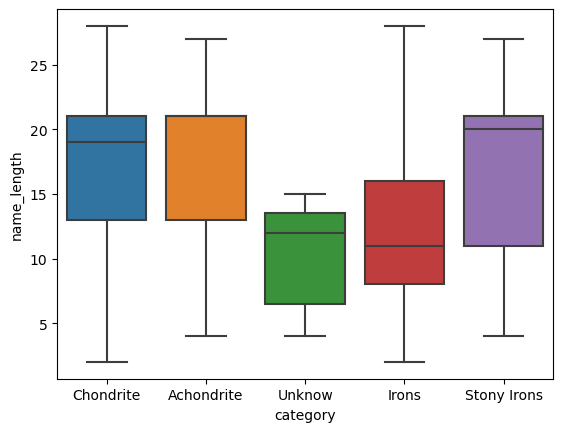

In [276]:
sns.boxplot(data=df, x='category', y='name_length')

<Axes: xlabel='name_length'>

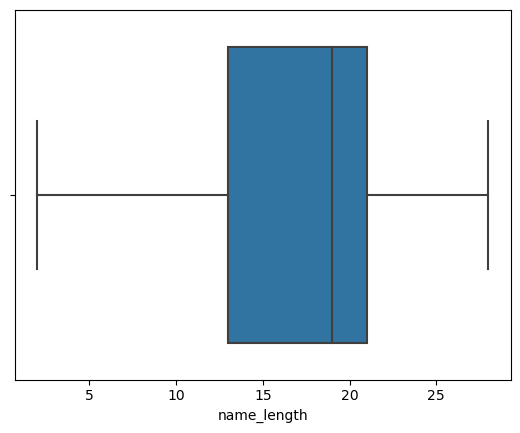

In [279]:
sns.boxplot(data=df, x='name_length')

<Axes: xlabel='name_type', ylabel='count'>

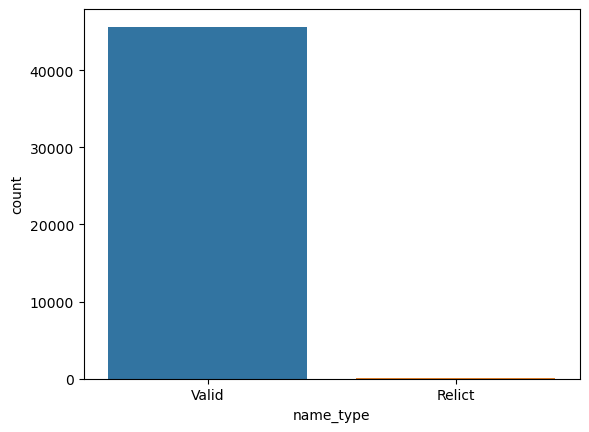

In [280]:
sns.countplot(data=df, x='name_type')

<Axes: xlabel='name_type', ylabel='name_length'>

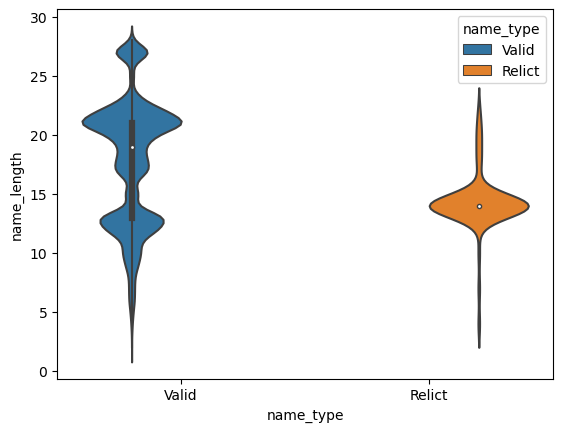

In [286]:
sns.violinplot(data=df, x='name_type', y='name_length', hue='name_type')